In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

In [2]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def save_image(image, path):
    cv2.imwrite(path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

In [3]:
def process_image(image, max_depth):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)
    clusters = [(pixels, np.arange(len(pixels)))]
    cluster_images = []
    
    for depth in range(max_depth + 1):
        new_clusters = []
        cluster_image = np.zeros_like(pixels)
        
        for pixel_group, indices in clusters:
            if len(pixel_group) > 1:
                kmeans = KMeans(n_clusters=2, random_state=42, max_iter=10).fit(pixel_group)
                labels = kmeans.labels_
                centroids = kmeans.cluster_centers_
                    
                for label in [0, 1]:
                    mask = (labels == label)
                    new_clusters.append((pixel_group[mask], indices[mask]))
                    cluster_image[indices[mask]] = centroids[label]
            else:
                cluster_image[indices] = pixel_group
        
        cluster_images.append(cluster_image.reshape(height, width, channels))
        clusters = new_clusters
    
    return cluster_images, len(clusters)

def display_and_save_results(image_path, max_depth, output_dir):
    image = load_image(image_path)
    cluster_images, actual_clusters = process_image(image, max_depth)
    
    for depth, cluster_image in enumerate(cluster_images):
        output_path = f"{output_dir}/clustered_image_depth_{depth}.png"
        save_image(cluster_image, output_path)
        plt.figure(figsize=(10, 10))
        plt.imshow(cluster_image)
        plt.title(f"Image at Depth {depth}")
        plt.axis('off')
        plt.show()


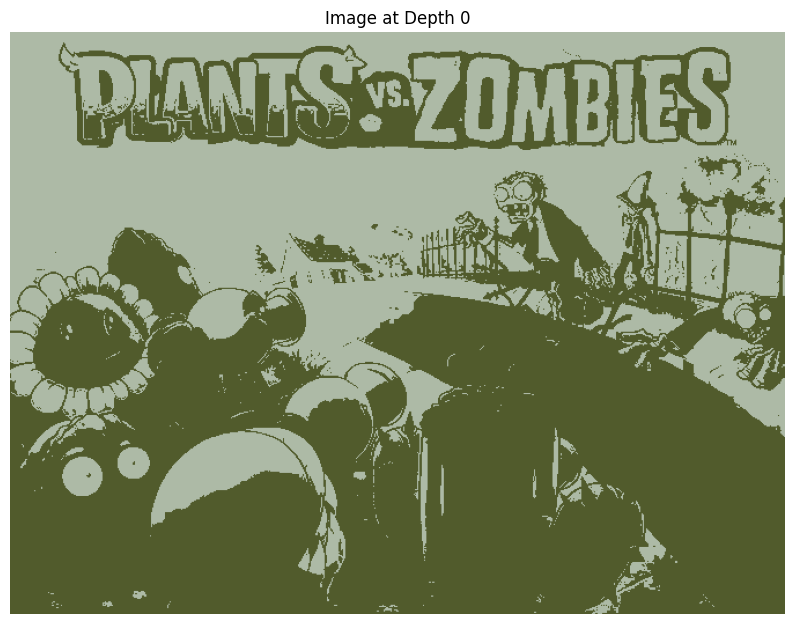

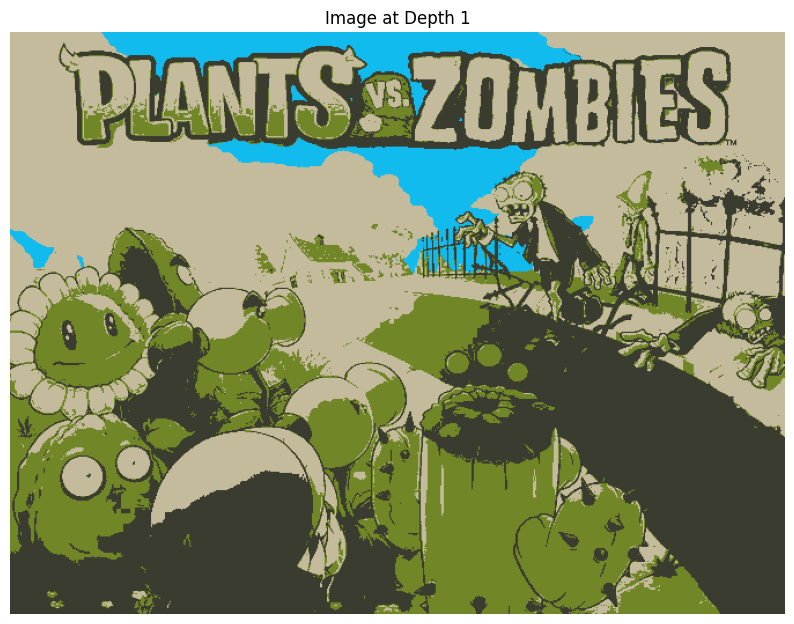

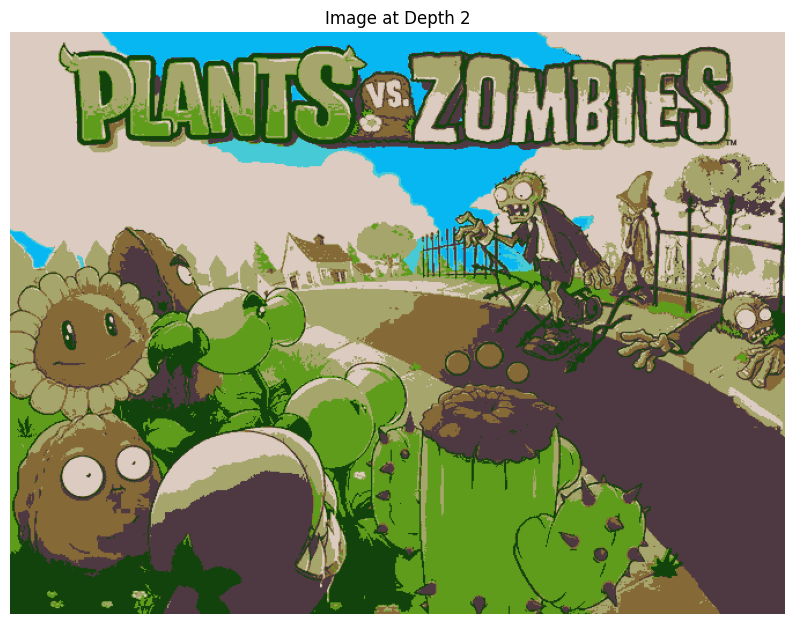

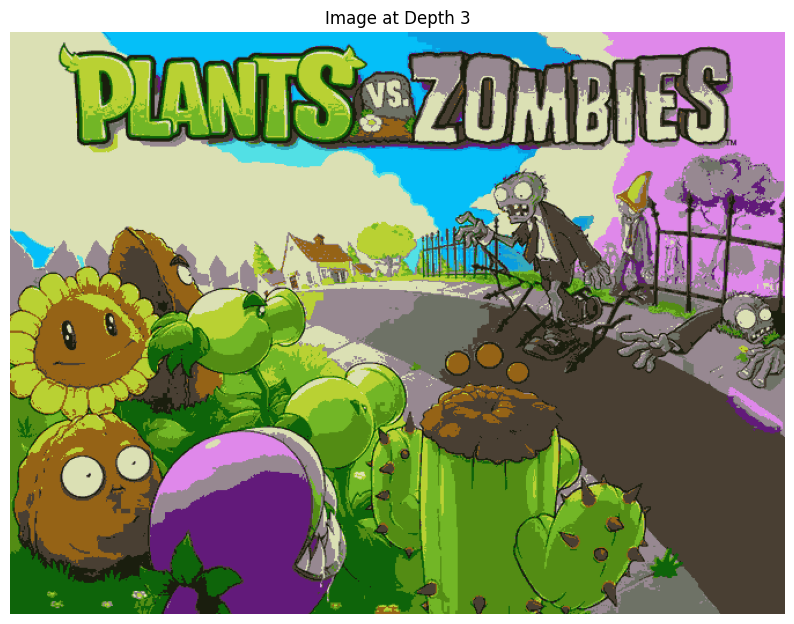

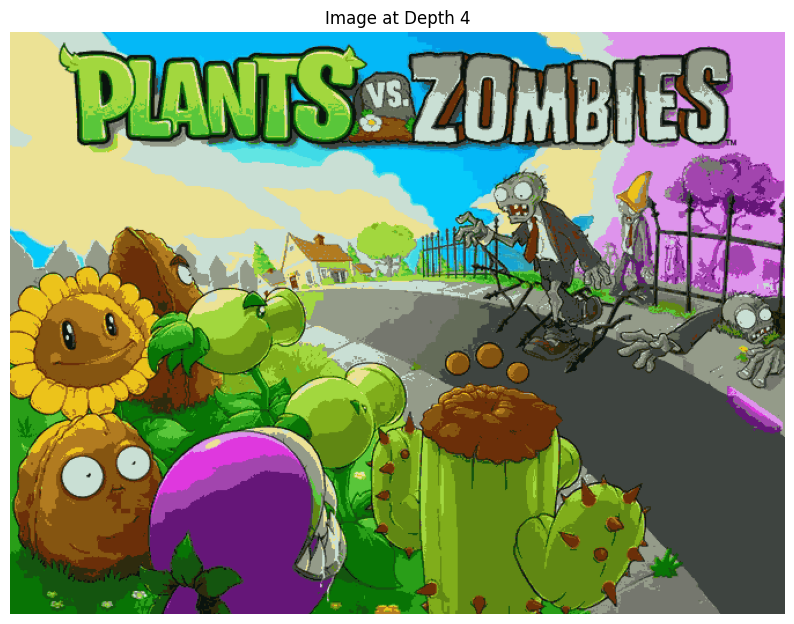

In [4]:
image_path = "pvz.png"  
output_dir = "output"
max_depth = 4

display_and_save_results(image_path, max_depth, output_dir)

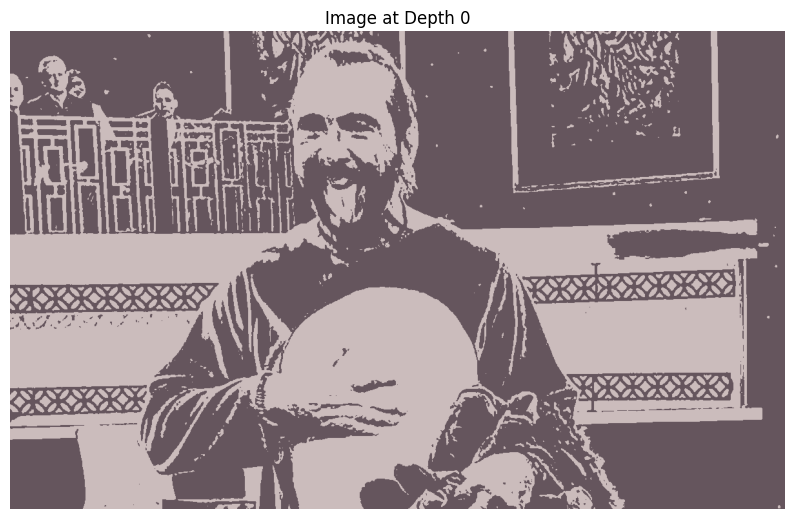

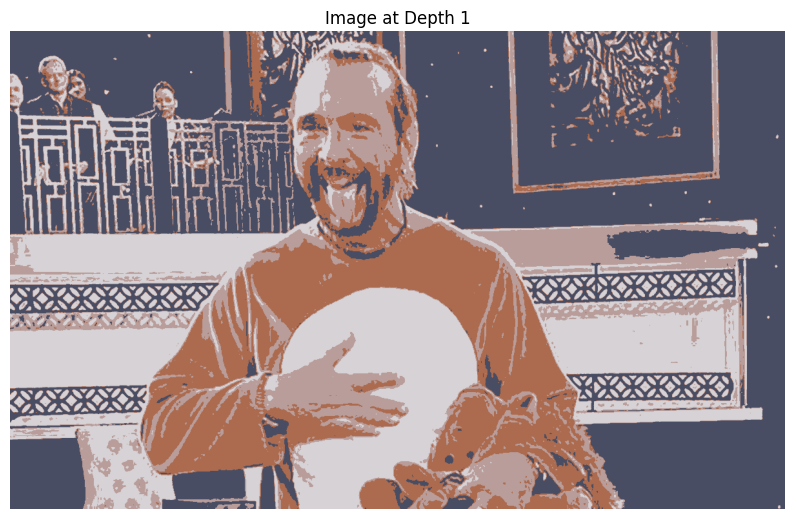

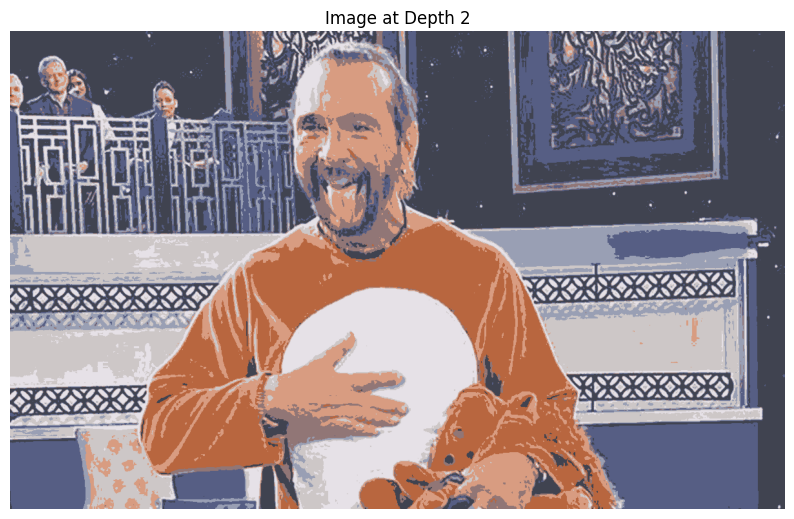

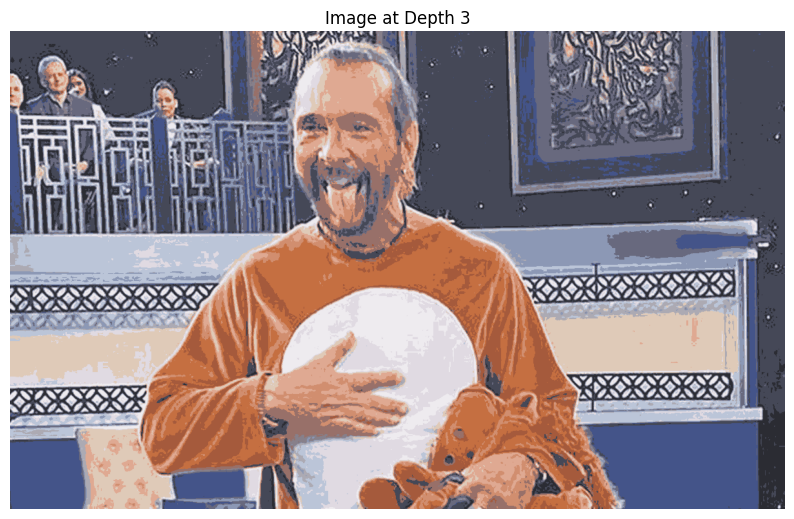

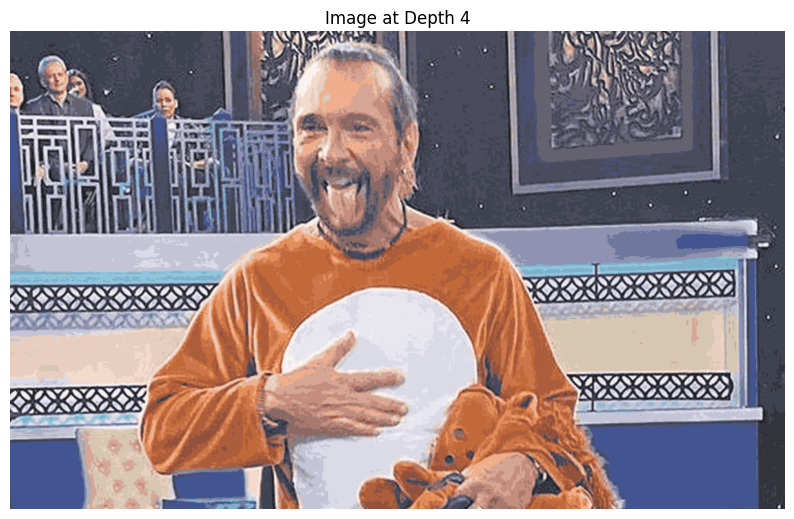

In [5]:
image_path = "perro.png"  
output_dir = "output"
max_depth = 4

display_and_save_results(image_path, max_depth, output_dir)

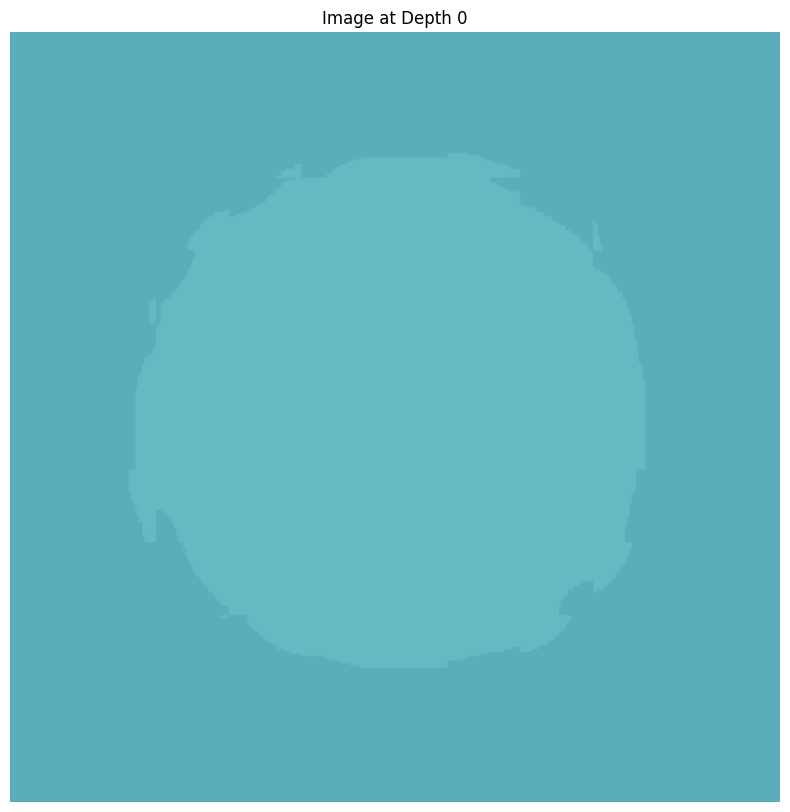

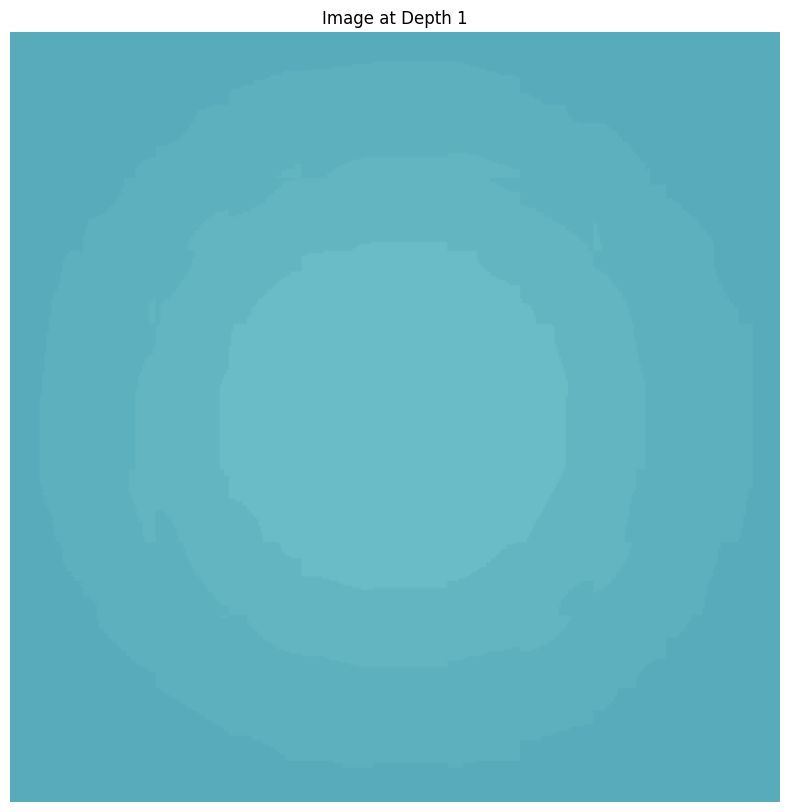

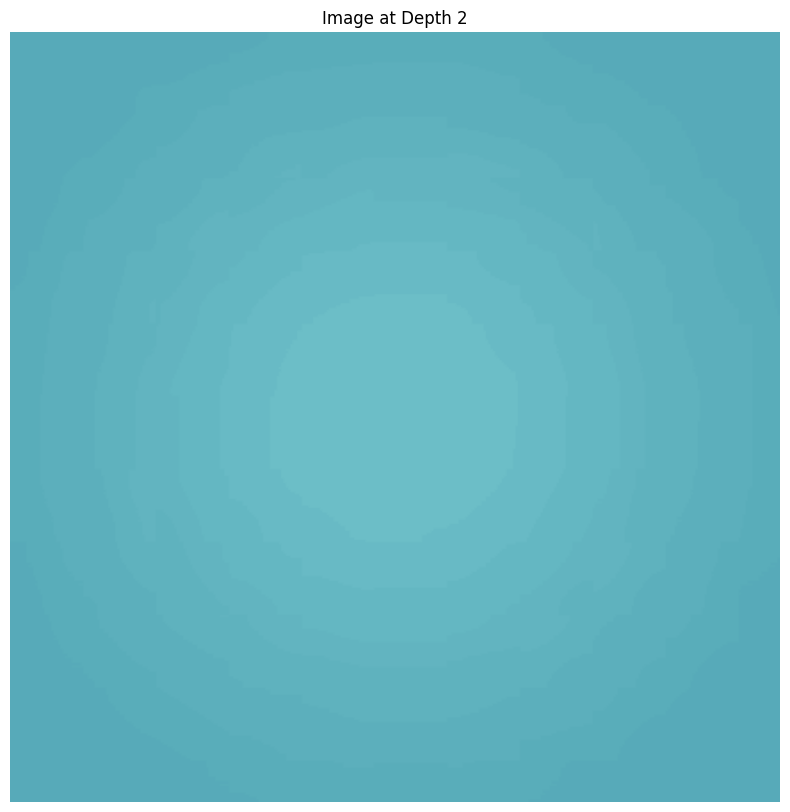

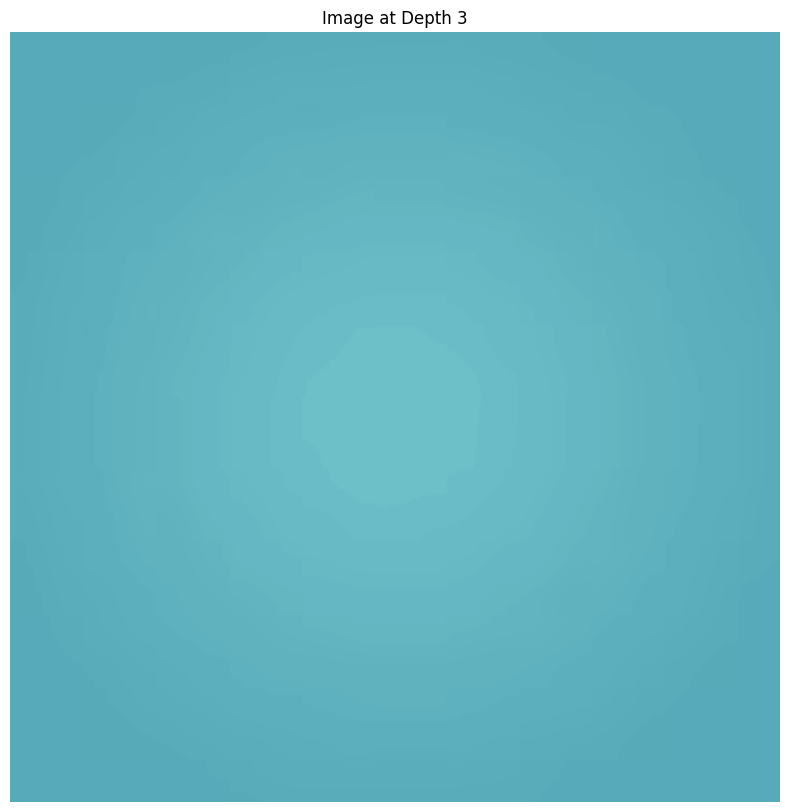

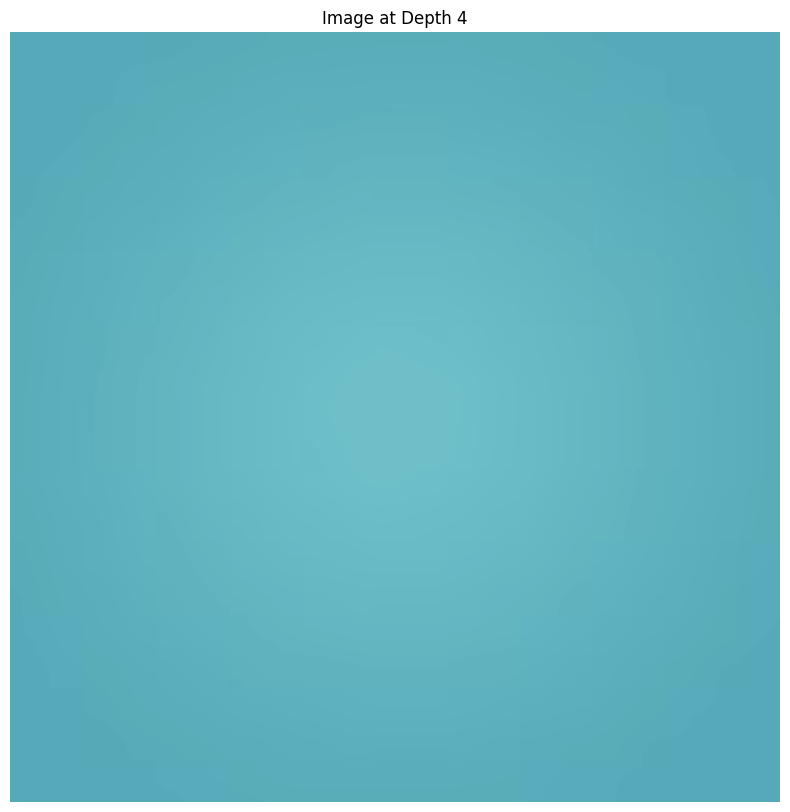

In [6]:
image_path = "solid.png"  
output_dir = "output"
max_depth = 4

display_and_save_results(image_path, max_depth, output_dir)

### Contributions:
Angel David Sansores Cruz: Handled reading and writing of images using OpenCV.


Hageo Juda Balam Mendez: Developed the image processinf and recursive depth control.


Julio Ernesto Dzul Dzib: Contributed to the display_and_save_results function, handling the visualization of clustered images.


Luis David Martinez Gutierrez: Worked on the integration and testing of the code, ensuring the functions work together as intended and debugging any issues.


Yahir Benjamin Sulu Chi: Organized the documentation of the script in the report and contributed to the debugging of the code.